<a href="https://colab.research.google.com/github/dogbull/nihhs-v22/blob/main/%EB%82%98%EB%A7%8C%EC%9D%98_%EC%9E%91%EB%AC%BC_%EC%83%9D%EC%9C%A1_%EB%AA%A8%ED%98%95_%EB%A7%8C%EB%93%A4%EA%B8%B03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나만의 작물 생육 모형 만들기3
* [나만의 작물 생육 모형 만들기1 (1/4)](https://colab.research.google.com/drive/1rCZZD8RO2ujJcg4OW-N_10Dm6Nfh8K6l?hl)
* [나만의 작물 생육 모형 만들기2 (2/4)](https://colab.research.google.com/drive/13jqzPAHMVxPNTGmMR1X97ecDQaVIQMXH)
* [**나만의 작물 생육 모형 만들기3 (3/4)**](https://colab.research.google.com/drive/12ldfgoyE5USxiZ15EbsQRvQDTEnZLp55)
* [나만의 작물 생육 모형 만들기4 (4/4)](https://colab.research.google.com/drive/1epUU1uIVmCjaPA_3KZWP0EoC9dPvyj4x)

---
`나만의 작물 생육 모형 만들기`에서는 [파이썬](https://www.python.org/) 컴퓨터 프로그래밍 언어를 이용하여 작물 생육 모형을 제작하는 실습을 수행합니다. 이 실습은 파이썬 환경설정에 소요되는 시간을 줄이기 위해 개인 컴퓨팅 환경이 아닌 [Google Colab](https://colab.research.google.com/?hl=ko)을 이용하여 진행하도록 합니다.

본 실습에서는 아래와 같은 내용을 다룹니다.

* Python과 Colab에 대해 알아봅니다.
* 기상청종관기상관측자료(KMA ASOS)를 시각화합니다.
* GDD(Growing Degree Days) 작물 생육 모형을 제작합니다.
* CHD(Chill-Days) 작물 생육 모형을 제작합니다.
* 격자형 자료를 생성하고 시각화합니다.


---
안녕하세요. `나만의 작물 생육 모형 만들기` 세 번째 시간입니다.

이번 시간에는 `GDD`, `CHD` 등 작물 생육 모형에 대해 알아보겠습니다.



[GDD모형](https://en.wikipedia.org/wiki/Growing_degree-day)은 최저기온과 최고기온을 이용하여 작물이 어느 정도 성장했는지 추정할 수 있는 모형입니다.

In [1]:
def gd_v1(tmin, tmax, base_temp):
    # 최저기온이 최고기온보다 큰 경우 두 값을 서로 바꿈.
    # 현실적이지 않은 값이 입력되어도 강제적으로 진행하도록 하기 위함.
    if tmin > tmax:
        tmin, tmax = tmax, tmin

    # tmax의 최대값을 30으로 제한.
    if tmax > 30:
        tmax = 30
    
    # tmin의 최소값을 base_temp로 제한.
    if tmin < base_temp:
        tmin = base_temp

    # GD 계산
    gd = ((tmin + tmax) / 2) - base_temp

    # gdd의 최소값을 0으로 제한.
    if gd < 0:
        gd = 0

    return gd


In [2]:
import numpy as np

def gd_v2(tmin, tmax, base_temp):
    tmin = np.minimum(tmin, tmax)  # tmin에는 tmin과 tmax중 더 작은 값을 할당.
    tmax = np.maximum(tmin, tmax)  # tmax에는 tmin과 tmax중 더 큰 값을 할당.

    tmin = np.maximum(tmin, base_temp)  # tmin에는 tmin과 base_temp중 더 큰 값을 할당(즉, tmin의 최소값을 base_temp로 제한).
    tmax = np.minimum(tmax, 30)  # tmax에는 tmin과 base_temp중 더 작은 값을 할당(즉, tmax의 최대값을 30으로 제한).
    
    gd = ((tmin + tmax) / 2) - base_temp  # GD 계산

    gd = np.maximum(gd, 0) # gd에 gd와 0중 더 큰 값을 할당(즉, gdd의 최소값을 0으로 제한).
    
    return gd

두 가지 버전의 `GD`(Growing Degree)를 계산하는 함수를 작성하였습니다. 첫 번째 버전은 보다 사람이 이해하기 쉽게 작성한 버전이고 두 번째는 컴퓨터가 보다 안정적으로 계산할 수 있는 버전입니다. 첫 번째 버전은 `if`와 같은 분기문에 의해 상황에 따라 실행되는 프로그램 코드 부분도 있고 실행되지 않는 코드 부분도 있습니다. 그런데 두 번째 버전은 어떠한 상황에도 프로그램 코드의 모든 부분이 실행된다고 보장됩니다. 그래서 두 번째 버전은 입력값에 따라 프로그램 코드가 다르게 동작하는 상황을 피할 수 있습니다.

이제 일별로 수행되는 위 함수의 결과값을 누적하는 함수를 작성하겠습니다.

In [3]:
# 어제까지누적된GDD(cgdd)에 당일의GDD(gdd2함수의결과값)를 더한 값을 반환합니다.

def gdd(tmin_ary, tmax_ary, base_temp):
    gdacc_ary = []
    gdacc = 0
    for tmin, tmax in zip(tmin_ary, tmax_ary):
        gdacc += gd_v2(tmin, tmax, base_temp)
        gdacc_ary.append(gdacc)
    return gdacc_ary

In [4]:
# pykawos 패키지 설치

! pip install -q pykawos

     |████████████████████████████████| 1.0 MB 12.0 MB/s 
     |████████████████████████████████| 16.7 MB 62.9 MB/s 
     |████████████████████████████████| 6.3 MB 46.0 MB/s 


In [5]:
import pykawos
import pandas as pd
import matplotlib.pylab as plt

In [6]:
# 서귀포(189)의 2021년 자료를 가져옵니다.

asos_189_2021 = pykawos.read_asos_single_point(189, '20210101', '20211231')

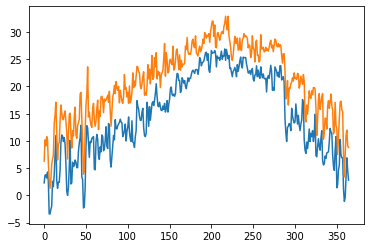

In [7]:
# 서귀포(189)의 2021년 최고,최저 기온을 시각화해봅니다.

plt.plot(asos_189_2021['min_ta'])
plt.plot(asos_189_2021['max_ta'])

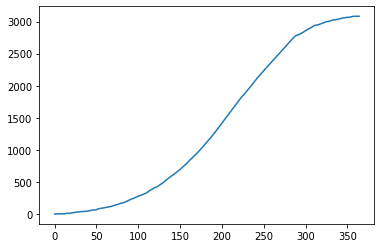

In [8]:
# 서귀포(189)의 2021년 최고,최저 기온 자료와 기준온도 10를 이용하여 GDD모형을 구동한 결과를 시각화합니다.

cgdd = gdd(asos_189_2021['min_ta'], asos_189_2021['max_ta'], 10)

plt.plot(cgdd)

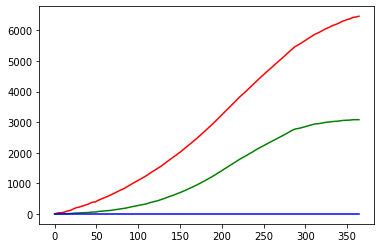

In [9]:
# 기준온도를 각각 0, 10, 30으로 설정하여 구동한 결과를 시각화합니다.

cgdd_00 = gdd(asos_189_2021['min_ta'], asos_189_2021['max_ta'], 0)
cgdd_10 = gdd(asos_189_2021['min_ta'], asos_189_2021['max_ta'], 10)
cgdd_30 = gdd(asos_189_2021['min_ta'], asos_189_2021['max_ta'], 30)

plt.plot(cgdd_00, 'r')
plt.plot(cgdd_10, 'g')
plt.plot(cgdd_30, 'b')

`기준온도`가 `0`으로 설정된 그래프의 기울기가 가장 가파른 것을 볼 수 있습니다. 반면 `30`으로 설정된 그래프의 기울기는 거의 변화없이 0에 근접한 것을 볼 수 있습니다. GDD모형의 결과만 놓고 보면, 서귀포에서는 기준온도가 30인 작물의 생장은 어려울 것으로 보입니다.

In [10]:
# 아래 실습을 위해 GDD모형을 DataFrame을 이용한 버전으로 수정합니다.

def gdd(dataframe, base_temp):
    df = dataframe.copy()
    gdacc = 0
    for i, row in df.iterrows():
        gdacc += gd_v2(row['min_ta'], row['max_ta'], base_temp)
        df.loc[i, 'gdacc'] = gdacc
    return df

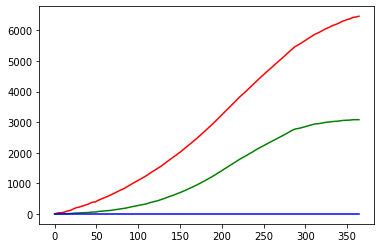

In [11]:
# 수정된 버전으로 계산해 봅니다.

cgdd_00 = gdd(asos_189_2021, 0)
cgdd_10 = gdd(asos_189_2021, 10)
cgdd_30 = gdd(asos_189_2021, 30)

plt.plot(cgdd_00['gdacc'], 'r')
plt.plot(cgdd_10['gdacc'], 'g')
plt.plot(cgdd_30['gdacc'], 'b')

다음으로 알아볼 볼 생육 모형은 Chill-day 모형(이하 `CHD`)입니다.

In [12]:
def chill(tn, tx, tc):
    # tn: 최저기온
    # tx: 최고기온
    # tc: 기준온도
    # ac: Anti-Chill
    # ch: Chill
    tm = (tx + tn) / 2
    if 0 <= tc <= tn <= tx:
        ch = 0
        ac = tm - tc
    elif 0 <= tn <= tc <= tx:
        ch = -((tm - tn) - ((tx - tc) / 2))
        ac = (tx - tc) / 2
    elif 0 <= tn <= tx <= tc:
        ch = -(tm - tn)
        ac = 0
    elif tn <= 0 and 0 <= tx <= tc:
        ch = -(tx / (tx - tn)) * (tx / 2)
        ac = 0
    elif tn <= 0 and 0 <= tc <= tx:
        ch = -((tx / (tx - tn)) * (tx / 2) - ((tx - tc) / 2))
        ac = (tx - tc) / 2
    else:
        ch = 0
        ac = 0
    return ch, ac

def chillday(dataframe, tc, rc):
    df = dataframe.copy()
    chacc = 0
    release = False
    df = dataframe.copy()
    for i, row in df.iterrows():
        ch, ac = chill(row['min_ta'], row['max_ta'], tc)
        release = release or (chacc <= rc)
        if release:
            chacc += ac
        else:
            chacc += ch
        df.loc[i, 'chacc'] = chacc
        df.loc[i, 'release'] = release
    return df


In [13]:
# CHD 모형은 이전년도의 10월01일부터 계산이 시작된다는 것에 주의합니다.
# 서귀포(189)의 2020년10월01일부터 2021년05월01일까지의 자료를 가져옵니다.

asos_189_for_chd = pykawos.read_asos_single_point(189, '20201001', '20210501')

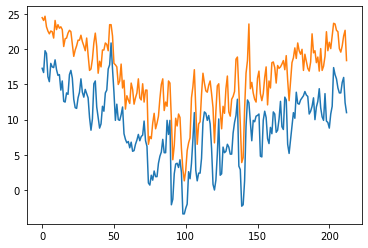

In [14]:
# 가져온 자료를 시각화해 봅니다.

plt.plot(asos_189_for_chd['min_ta'])
plt.plot(asos_189_for_chd['max_ta'])

In [15]:
# Chill-day 모형을 실행합니다.
# 기준온도(tc): 5.1
# 저온요구도(rc): -111

tc = 5.1
rc = -111

chd = chillday(asos_189_for_chd, tc, rc)

chd[['dt', 'chacc', 'release']]

,dt,chacc,release
0,2020-10-01,0.000000,False
1,2020-10-02,0.000000,False
2,2020-10-03,0.000000,False
3,2020-10-04,0.000000,False
4,2020-10-05,0.000000,False
...,...,...,...
208,2021-04-27,-51.075173,False
209,2021-04-28,-51.075173,False
210,2021-04-29,-51.075173,False
211,2021-04-30,-51.075173,False


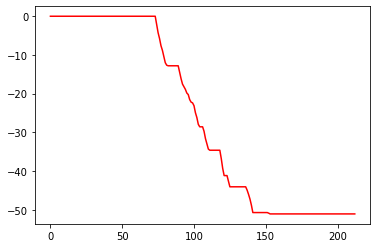

In [16]:
# Chill-days누적(chacc)값을 시각화해 봅니다.

plt.plot(chd['chacc'], 'r')

위 결과 x축 `130` 인근에서 chill-days의 누적이 약 `-50`로 고정되어 시일이 지나도 더 이상 변화가 없는 것을 볼 수 있습니다. 이는 CHD 모형 계산에 사용된 모수(기준온도, 저온요구도)가 서귀포(189)에 맞지 않는 것이 원인입니다. 앞서 설정된 모수는 `농업기상재해조기경보` 연구에서 사용되는 값으로써, 국내 주산지에서 재배되는 특정 품종에 대한 값입니다. 이 모형의 결과를 놓고 추측컨데 해당 품종은 제주도에서 정상적인 생장을 하지 못할 것으로 생각됩니다.

본 실습을 계속하기 위해 기준온도를 임의의 값으로 상향 조정하여(보다 높은 기온에서도 휴면을 유지하기 위함) 모델을 강제 실행해 보도록 합니다.

In [17]:
# Chill-day 모형을 실행합니다.
# 기준온도(tc): 11
# 저온요구도(rc): -111

tc = 11
rc = -111

chd = chillday(asos_189_for_chd, tc, rc)

chd[['dt', 'chacc', 'release']]

,dt,chacc,release
0,2020-10-01,0.000000,False
1,2020-10-02,0.000000,False
2,2020-10-03,0.000000,False
3,2020-10-04,0.000000,False
4,2020-10-05,0.000000,False
...,...,...,...
208,2021-04-27,200.030544,True
209,2021-04-28,206.930544,True
210,2021-04-29,214.880544,True
211,2021-04-30,221.430544,True


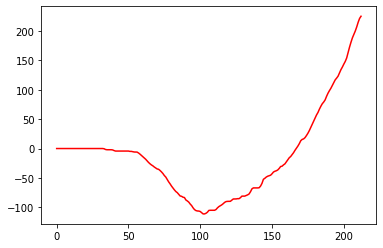

In [18]:
# Chill-days누적(chacc)값을 시각화해 봅니다.

plt.plot(chd['chacc'], 'r')

기대한 그래프 형태가 출력되었습니다. x축 `100` 인근(10월01일에서 100일을 더한 날짜)에서 휴면해제가 되고(저온적산을 멈추고) 고온적산을 시작하는 것을 볼 수 있습니다. 보통 고온적산은 고온요구도까지 지속되지만 본 실습에서는 편의상 이를 무시하였습니다.

In [19]:
# 결과를 보다 상세히 살펴보기 위해 plotly ex.로 시각화해 봅니다.

import plotly.express as px

fig = px.line(chd['chacc'])

fig.show()

In [20]:
# x축에 날짜를 표시해 봅니다.

import plotly.express as px

fig = px.line(chd, x='dt', y='chacc')

fig.show()

사용자가 선택해야 하는 모수가 변경됨에 따라 출력이 어떻게 변하는지 보다 빠르게 알아보기 위해 사용자와 상호작용하는 차트를 만들어 보겠습니다.

In [21]:
# 먼저 저온요구도(rc)를 -200 부터 -110까지 10씩 증가시키면서 10벌을 미리 계산해 둡니다.

df_ary = []
for rc in range(-200, -100, 10):
    print(F'rc={rc}')
    df = chillday(asos_189_for_chd, 11, rc)
    df['rc'] = rc
    df_ary.append(df)

df2 = pd.concat(df_ary).reset_index()

rc=-200
rc=-190
rc=-180
rc=-170
rc=-160
rc=-150
rc=-140
rc=-130
rc=-120
rc=-110


In [22]:
# 앞서 미리 계산된 여러 벌의 저온요구도 중 하나를 선택하여 시각화할 수 있도록 합니다.

import plotly.express as px

fig = px.line(df2, x='dt', y='chacc', animation_frame='rc')

fig.show()

---
GDD모형에 대해서도 동일하게 적용해 봅니다.

In [23]:
# GDD기준온도를 0부터 20까지에 대해 미리 계산해 놓습니다.

df_ary = []
for base_temp in range(0, 21):
    df = gdd(asos_189_2021, base_temp)
    df['base_temp'] = base_temp
    df_ary.append(df)

df2 = pd.concat(df_ary).reset_index()

In [24]:
# pandas dataframe의 base_temp를 기준으로 grouping 하여 시각화합니다.

import plotly.express as px

fig = px.line(df2, x='dt', y='gdacc', animation_frame='base_temp')

fig.show()

이상으로 세 번째 `GDD`, `CHD`모형 실습을 마치도록하겠습니다.

감사합니다.